# **Importing the Required Libraries & Pacakges**

In [48]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')

## **`Uploding .CSV file that contains Login Credentials`**

In [2]:
# Load the Data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [68]:
# Reading the Data
log = pd.read_csv('Login.csv')
print(log)

                                                 key
0                          oLQlZNqjlle90USGi70Nh2pcE
1  9EX9VcJITGF85pQ3cqXjZln30u8zT9ieCB1GhoUGChj7sm...
2  1016547339148845056-Vtpj5inO2ohhieG3X6fWPKtSPC...
3      CAJdURRlnrfHj6iBNCWti92IOh62Pks8UhJfGovFOtXBr


In [50]:
# Twitter API Credentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]

## **`Authenticate Twitter login Credientails`**

In [51]:
# create the Authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [52]:
# Extract 100 tweets from the twitter user
# posts = api.user_timeline(screen_name="BillGates", count = 500, lang ="en", tweet_mode="extended") 
posts = api.search(q = "petrol -filter:retweets", count = 100, include_rts = False, lang ="en", tweet_mode="extended")

#  Print some tweets
print("Show the 12 recent tweets:\n")
i=1
for tweet in posts[:12]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 12 recent tweets:

1) @DKShivakumar, As you are going to Campaign in Majeshwaram, where INC's Direct Fight is with BJP,
.
So, Use Petrol Price Hikes, LPG Price Hikes to the most.
.
Its a Simple Hack to Defeat BJP.
.
@INCKarnataka

2) @ArvindKejriwal @capt_amarinder @ashokgehlot51 @ArvindKejriwal u r state too have similar situation? How R U handling ?

In pandemic year how to face hike? 

Petrol Diesel prices increase started impacting 

#Exams #ExamWarriors @rsprasad comment on fees hike too.
@TOIIndiaNews https://t.co/SV9dcNGYNk

3) Every Rupee added to petrol diesel is adds up to cost of consumables and adds up to inflation..and further adding up to to common men's challenges due to pandemic..

but govt see petrol diesel as revenue only.. https://t.co/LtaA4ms3nS

4) @MAK20172575 @MuhammadMobinK4 MAK is confused how come a PM without acuman is able to put economy on the right track. First time in Pak history a PM is not asking SBP to print notes, has well defined Foreign pol

In [53]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 8 rows of data
df.head(11)

,Tweets
0,"@DKShivakumar, As you are going to Campaign in..."
1,@ArvindKejriwal @capt_amarinder @ashokgehlot51...
2,Every Rupee added to petrol diesel is adds up ...
3,@MAK20172575 @MuhammadMobinK4 MAK is confused ...
4,"If your family is going to send you around, ma..."
5,Contact #Lashkar_e_RSS for \n\n-Attacking Farm...
6,@republic Credit goes to Petrol price hike😃
7,Diesel and petrol prices hiked in Sudan https:...
8,"Thanks to the current government, I get an eer..."
9,@indijaswaloye 😂😂petrol bomb to ahmed bnata hai


In [54]:
# posts1 = api.user_timeline(screen_name="POTUS", count = 500, lang ="en", tweet_mode="extended") 
# posts1 = api.search(q = "godimedia", count = 200,exclude_replies=True, include_rts=False, lang ="en", tweet_mode="extended")

#  Print some tweets
# print("Show the 12 recent tweets:\n")
# i=1
# for tweet in posts1[:12]:
#     print(str(i) +') '+ tweet.full_text + '\n')
#     i= i+1

In [ ]:
# Create a dataframe with a column called Tweets
#df2 = pd.DataFrame([tweet.full_text for tweet in posts1], columns=['Tweets'])
# Show the first 8 rows of data
#df2.head(11)

In [ ]:
# df = pd.concat([df1,df2], axis=0)
# len(maindf)

In [ ]:
 # from google.colab import drive
# drive.mount('/content/drive')

In [55]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,", As you are going to Campaign in Majeshwaram,..."
1,_amarinder 51 u r state too have similar sit...
2,Every Rupee added to petrol diesel is adds up ...
3,20172575 4 MAK is confused how come a PM witho...
4,"If your family is going to send you around, ma..."
...,...
95,everytime I think delivery charge or shipping ...
96,"It is, it's pack ""52. Petrol Station accessor..."
97,"True, we are all just waiting to die but we ca..."
98,going for electric vehicles is the only soluti...


In [56]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,", As you are going to Campaign in Majeshwaram,...",0.419048,0.200000
1,_amarinder 51 u r state too have similar sit...,0.400000,0.000000
2,Every Rupee added to petrol diesel is adds up ...,0.593750,-0.106250
3,20172575 4 MAK is confused how come a PM witho...,0.463810,0.102143
4,"If your family is going to send you around, ma...",0.888889,0.500000
...,...,...,...
95,everytime I think delivery charge or shipping ...,0.600000,0.200000
96,"It is, it's pack ""52. Petrol Station accessor...",0.000000,0.000000
97,"True, we are all just waiting to die but we ca...",0.650000,0.350000
98,going for electric vehicles is the only soluti...,1.000000,0.000000


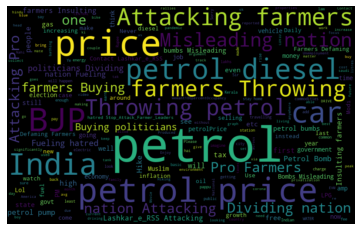

In [57]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [58]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,", As you are going to Campaign in Majeshwaram,...",0.419048,0.200000,Positive
1,_amarinder 51 u r state too have similar sit...,0.400000,0.000000,Neutral
2,Every Rupee added to petrol diesel is adds up ...,0.593750,-0.106250,Negative
3,20172575 4 MAK is confused how come a PM witho...,0.463810,0.102143,Positive
4,"If your family is going to send you around, ma...",0.888889,0.500000,Positive
...,...,...,...,...
95,everytime I think delivery charge or shipping ...,0.600000,0.200000,Positive
96,"It is, it's pack ""52. Petrol Station accessor...",0.000000,0.000000,Neutral
97,"True, we are all just waiting to die but we ca...",0.650000,0.350000,Positive
98,going for electric vehicles is the only soluti...,1.000000,0.000000,Neutral


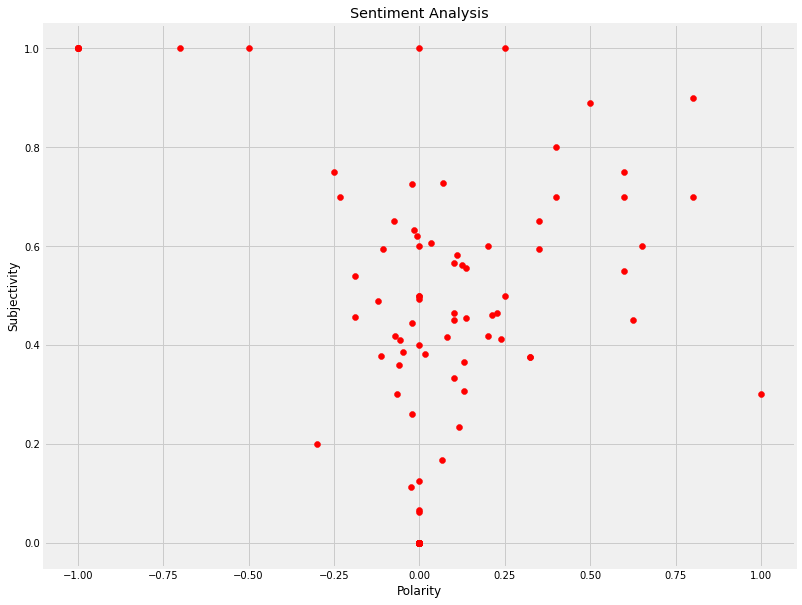

In [63]:
# Plotting 
plt.figure(figsize=(12,10)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Red') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
# plt.grid(False)
plt.show()

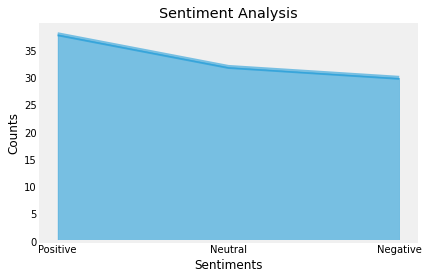

In [66]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df2 = df['Analysis'].value_counts()
df2.plot(kind='area', stacked=False);
plt.grid(True)
plt.show()

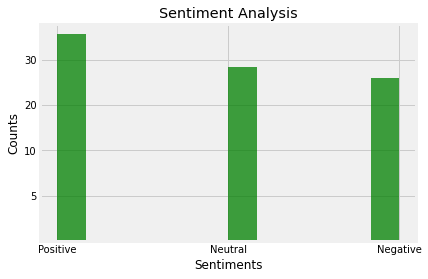

In [67]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.yticks([0.5,1.0, 1.5, 2.0, 2.5,3.0],
['5', '10', '20', '30', '40', '50'])
df2 = df['Analysis']
df2.hist(bins = 12, density=1, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()